# How to select an embedding model?

### What is an Embedding?

- Dense, continuous vectors representing text in a high-dimensional space. 
- These vectors serve as coordinates in a semantic space, capturing the relationships and meanings between words. 
- In the context of LLMs, embeddings play an important role in retrieving the right context for RAG.

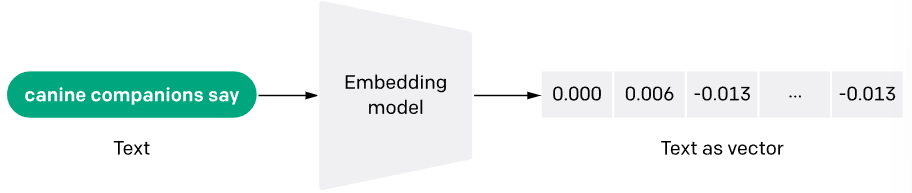

### Why Do You Need Embeddings?

- Form the foundation for achieving precise and contextually relevant LLM outputs across different tasks.

### Usecases/ Application:

- Conversational Search
    - Involve dynamic and evolving contexts, and embeddings help represent the nuances and relationships within the dialogue. 
    - By encoding both user queries and system responses, embeddings enable the RAG system to retrieve relevant information and generate context-aware responses.

- InContext Learning (ICL)
    - Involves retrieving demonstrations relevant to the context of each input query. 
    - Enhances the learning process's efficiency and scalability and addresses biases inherent in manual example selection.

- Tool Fetching
    - Involves retrieving relevant tools or resources based on user queries or needs. - Encode the semantics of both the user's request and the available tools
    - Enabling the RAG system to perform effective retrieval and present contextually relevant tools. 
    - Enhances the accuracy of tool recommendations, contributing to a more efficient and user friendly experience.

### Impact of Embeddings on RAG Performance
- Encoder selection to generate embeddings is a critical decision, hugely impacting the overall success of the RAG system. 
- Low quality embeddings lead to poor retrieval. 

### Selection Criteria:

The Massive Text Embedding Benchmark (MTEB) provides insights into popular embedding models from OpenAI, Cohere, and Voyager, among others. 
 
However, custom evaluation on your dataset is essential for accurate performance assessment.

Let’s review some of the selection criteria to consider before making your decision.

- Vector Dimension
- Performance Evaluation - Average retrieval performance
- Model size
- Type of Embedding models: Private vs. Public Embedding Model

    Although the embedding model provides ease of use, it entails certain trade-offs. 

    Private embedding API:
    - Offers high availability without the need for intricate model hosting engineering.
    - Counterbalanced by scaling limitations: Crucial to verify the rate limits and explore options for increasing them. 
    - Model improvements come at no extra cost. 

    Public embedding API:
    - Companies such as OpenAI, Cohere, and Voyage consistently release enhanced embedding models. 
    - Simply run your benchmark for the new model and implement a minor change in the API, making the process exceptionally convenient.
- Querying Cost
    - Ensure high availability of the embedding API service
    - Consider factors like model size and latency needs. 
    - OpenAI and similar providers offer reliable APIs, while open-source models may require additional engineering efforts.
- Indexing Cost
    - Influenced by the chosen encoder service. 
    - Separate storage of embeddings is advisable for flexibility in service resets or reindexing.
- Storage Cost
    - Scales linearly with dimension, and the choice of embeddings, such as OpenAI's in 1526 dimensions, impacts the overall cost. 
    - Calculate average units per document to estimate storage cost.
- Search Latency
    - Latency of semantic search grows with the dimension of embeddings. 
    - Opt for low dimensional embeddings to minimize latency.
- Language Support
    - Choose a multilingual encoder or use a translation system alongside an English encoder to support non-English languages.
- Privacy Concerns
    - Stringent data privacy requirements, especially in sensitive domains like finance and healthcare, may influence the choice of embedding services. 
    - Evaluate privacy considerations before selecting a provider.
- Granularity of text
    - Various levels: word-level, sentence-level, and document-level representations, influence the depth of semantic information embedded. 
    - For example, optimizing relevance and minimizing noise in the embedding process can be achieved by segmenting large text into smaller chunks. 
    - Due to the constrained vector size available for storing textual information, embeddings become noisy with longer text.

### Types of Embedding models:

- Different types of embeddings are designed to address unique challenges and requirements in different domains. 
- Knowing your use case will help decide which embedding type to employ. 

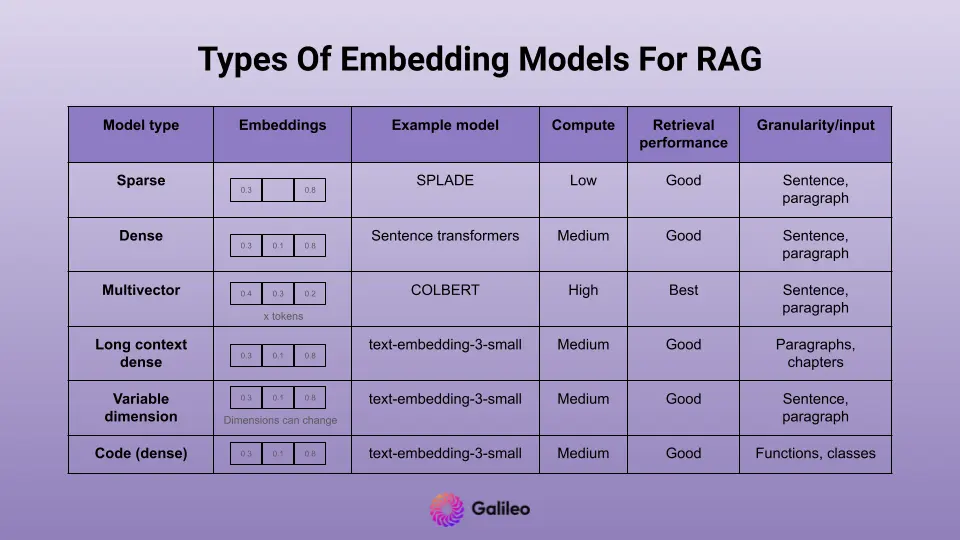

Dense Embeddings
- Continuous, real-valued vectors that represent information in a high-dimensional space. 
- Eg: Models like OpenAI’s Ada or sentence transformers, contain non-zero values for every element. 
- Focus on capturing the overall semantic meaning of words or phrases
- Suitable for tasks like dense retrieval which involve mapping text into a single embedding. 
- Helps effectively match and rank documents based on content similarity.
- Dense retrieval models utilize approximate nearest neighbors search to efficiently retrieve relevant documents. 
- Embeddings usually referred to for semantic search and vector databases.

Sparse Embeddings
- Representations where most values are zero, emphasizing only relevant information. 
- Essential for scenarios with many rare keywords or specialized terms
- Contain non-zero values for every element, 
- Focus on relative word weights per document, resulting in a more efficient and interpretable system.
- Sparse vectors like SPLADE are especially beneficial in domains with specific terminologies, such as the medical field, where many rare terms may not be present in the general vocabulary. 
- Helps overcome the limitations of Bag-of-Words (BOW) models, addressing the vocabulary mismatch problem.

Multi-Vector Embeddings
- Models like ColBERT feature late interaction, where the interaction between query and document representations occurs late in the process, after both have been independently encoded. 
- Leading to increased computational complexity.
- Allows for the pre-computation of document representations, contributing to faster retrieval times and reduced computational demands.
- Suitable for processing large document collections
- ColBERT's multi-vector embedding strategy involves encoding queries and documents independently, followed by a lightweight interaction step, ensuring efficiency and scalability.

Long Context Embeddings
- Long documents have always posed a particular challenge
- Limitation on maximum sequence lengths, often rooted in architectures like BERT, leads to practitioners segmenting documents into smaller chunks. 
- Segmentation can result in fragmented semantic meanings and misrepresentation of entire paragraphs. 
- Increases memory usage, computational demands during vector searches, and latencies.
- Models like BGE-M3 make it possible to encode sequences as long as 8,192 tokens
- Helps reduce vector storage and latency without much loss in retrieval performance.

Variable Dimension Embeddings
- Unique concept built on Matryoshka Representation Learning (MRL). 
- MRL learns lower-dimensional embeddings that are nested into the original embedding, akin to a series of Matryoshka Dolls. 
- Each representation sits inside a larger one, from the smallest to the largest "doll". 
- This hierarchy of nested subspaces is learned by MRL, and it efficiently packs information at logarithmic granularities.

Code Embeddings
- Integrate AI-powered capabilities into Integrated Development Environments (IDEs)
- Transforming how developers interact with codebases. 
- Offers semantic understanding, allowing it to interpret the intent behind queries related to code snippets or functionalities. 
- Built by training models on paired text data, treating the top-level docstring in a function along with its implementation as a (text, code) pair.
- Code embedding like OpenAI’s text-embedding-3-small and jina-embeddings-v2-base-code makes it easy to search through code, build automated documentation, and create chat-based code assistance.

### How to Measure Embedding Performance

MTEB: Massive Text Embedding Benchmark

- Retrieval metrics help us measure the performance of embeddings. 
- Each dataset in the retrieval evaluation comprises a corpus, queries, and a mapping associating each query with relevant documents from the corpus. 
- The objective is to identify these pertinent documents. 
- The provided model is employed to embed all queries and corpus documents.
- Then similarity scores are calculated using cosine similarity.
- Subsequently, the corpus documents are ranked for each query based on these scores, and metrics such as nDCG@10.

MTEB
- Provides insights into some of the best embedding models
- Fails to determine the optimal choice for specific domains or tasks. 
- Vital: Conduct an evaluation on your own dataset. 

Often, we possess raw text and aim to assess the RAG performance on user queries. In such scenarios, metrics such as chunk attribution can be quite useful.

### Chunk attribution 
- Identifies which chunks or documents retrieved were actually utilized by the model to generate an answer. 
- An attribution score of 0 indicates that the retrieval was unable to fetch the necessary documents required to answer the question. 
- The average score represents the ratio of utilized chunks (in float) at a run level.

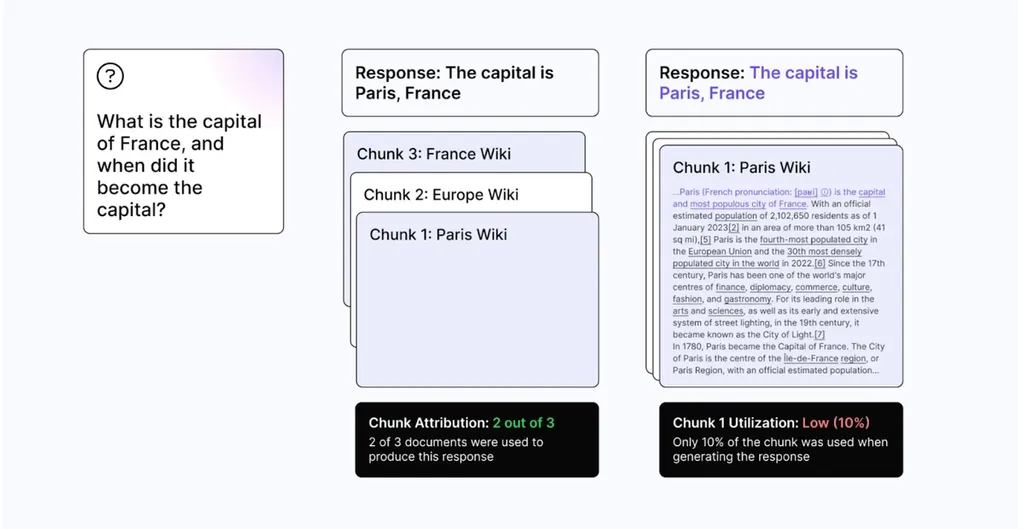

### Choosing the Right Embedding Model

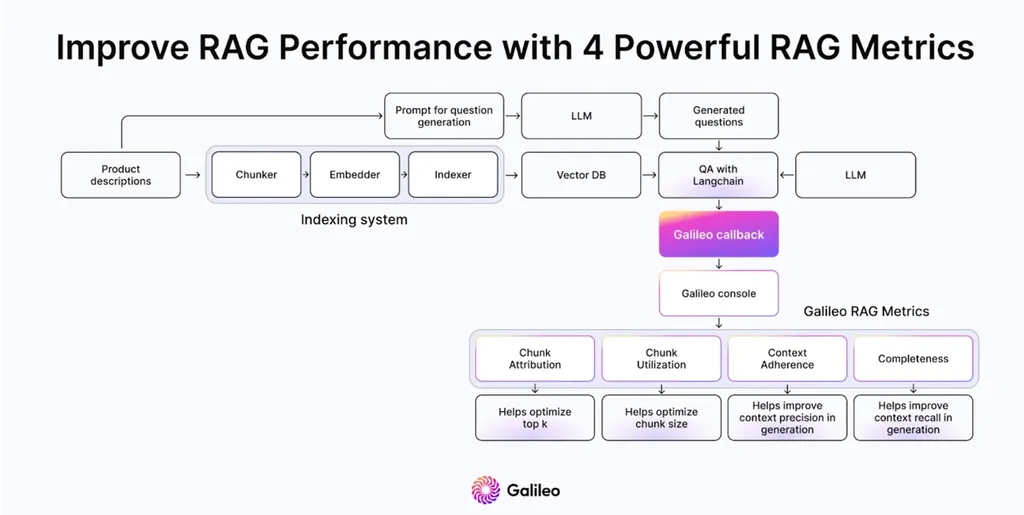

- Let's explore how we can utilize chunk attribution to choose the optimal embedding model for our RAG system. 
- We can identify which embedding model is most suitable for our use case by attributing retrieved chunks to generated outputs.

RAG Evaluation Metrics

Outline the metrics for Galileo to calculate for every run. 

- Chunk Attribution: A chunk-level boolean metric that measures whether a ‘chunk’ was used to compose the response.

- Chunk Utilization: A chunk-level float metric that measures how much of the chunk text that was used to compose the response.

- Completeness: A response-level metric measuring how much of the context provided was used to generate a response

- Context Adherence: A response-level metric that measures whether the output of the LLM adheres to (or is grounded in) the provided context.

Reference:

https://www.rungalileo.io/blog/mastering-rag-how-to-select-an-embedding-model#:~:text=When%20selecting%20an%20embedding%20model,%2C%20and%20Voyager%2C%20among%20others.

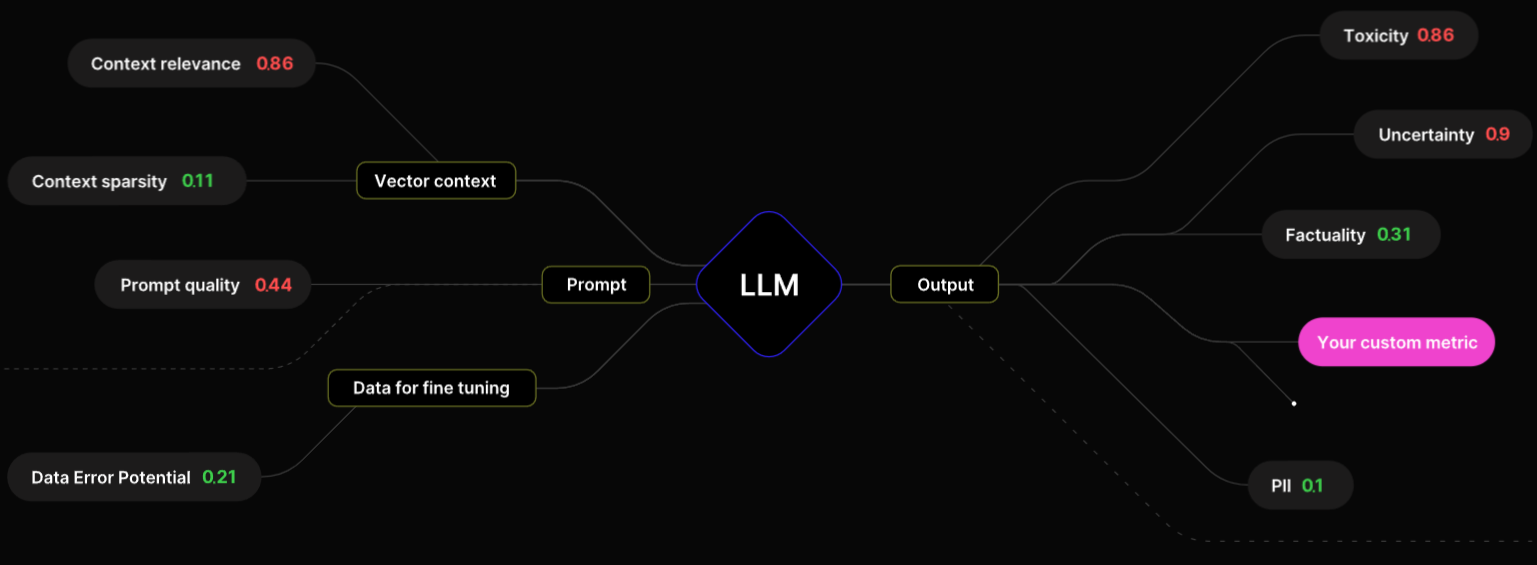

Data preparation

We perform straightforward parsing using the PyPDF library, yielding large chunks without applying any advanced chunking. This process results in approximately 415 sizable text chunks.

In order to test our RAG system, we need a set of questions to ask. 

Leveraging GPT-turbo with a zero-shot instruction prompt, we generate a question for each text chunk.

In [ ]:
# from langchain_openai import ChatOpenAI
# from langchain_core.messages import HumanMessage
# from langchain_community.llms import HuggingFaceHub
# from dotenv import load_dotenv
# load_dotenv()

# def get_questions(text, chat_model):
#     questions = chat_model.invoke([HumanMessage(content=
#                                                 f"""Your job is to generate only 1 short question from the given text 
#                                                 such that it can be answered using the provided text. Use the exact info 
#                                                 in the questions as mentioned in the text. Return questions starting with - instead of numbers.
#                                                 Text: {text}
#                                                 Questions: """
#                                                 )
#                                    ]
#                                   )
#     questions = questions.content.replace("- ", "").split("\n")
#     questions = list(filter(None,questions))
#     return questions

In [1]:
import nest_asyncio
nest_asyncio.apply()
from llama_index.core.llama_dataset.generator import RagDatasetGenerator
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader, ServiceContext
from llama_index.core.evaluation import DatasetGenerator, FaithfulnessEvaluator, RelevancyEvaluator
from langchain_community.llms import Ollama
from langchain_community.embeddings import OllamaEmbeddings
import time
import os
from llama_index.core import (ServiceContext,SimpleDirectoryReader,StorageContext,VectorStoreIndex,set_global_service_context)

c:\Project_Files\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load Data
reader = SimpleDirectoryReader("./documents/Data_Science_Interview_Preparation_30_Days")
documents = reader.load_data()
documents

[Document(id_='0543712f-c8a4-4300-bc3d-a59d9f955fcf', embedding=None, metadata={'page_label': '1', 'file_name': 'Data Science Interview Interview Questions(#Day28).pdf', 'file_path': 'c:\\Project_Files\\Langchain\\documents\\Data_Science_Interview_Preparation_30_Days\\Data Science Interview Interview Questions(#Day28).pdf', 'file_type': 'application/pdf', 'file_size': 1197925, 'creation_date': '2024-04-11', 'last_modified_date': '2024-03-08'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text=' \n \nP a g e  1 | 16 \n \n \n \n \n \nDATA SCIENCE  \nINTERVIEW  \nPREPARATION  \n(30 Days of Interview Preparation)  \n \n# Day28  \n    ', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metad

In [4]:
# Initialize Ollama model with "llama2" configuration.
llm = Ollama(model="llama2")
# Initialize Ollama embeddings.
embeddings = OllamaEmbeddings()
service_context_llama2 = service_context = (ServiceContext.from_defaults(llm=llm,embed_model=embeddings,chunk_size=512))

C:\Users\91984\AppData\Local\Temp\ipykernel_2520\4172667652.py:5: DeprecationWarning: Call to deprecated class method from_defaults. (ServiceContext is deprecated, please use `llama_index.settings.Settings` instead.) -- Deprecated since version 0.10.0.
  service_context_llama2 = service_context = (ServiceContext.from_defaults(llm=llm,embed_model=embeddings,chunk_size=300))


In [14]:
eval_documents = documents[80]
eval_documents

Document(id_='cfd9b5e1-b16d-4e99-9838-0f697a76c883', embedding=None, metadata={'page_label': '17', 'file_name': 'Data Science Interview Preparation(#DAY 04).pdf', 'file_path': 'c:\\Project_Files\\Langchain\\documents\\Data_Science_Interview_Preparation_30_Days\\Data Science Interview Preparation(#DAY 04).pdf', 'file_type': 'application/pdf', 'file_size': 1248759, 'creation_date': '2024-04-11', 'last_modified_date': '2024-03-08'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text=' \n \nMost prominent advantages of Backpropagation are:  \n\uf0b7 Backpropagation is the fast, simple and easy to program . \n\uf0b7 It has no parameters to tune apart from the numbers of input . \n\uf0b7 It is the flexible method as it does not require prior knowledge about \nthe 

In [15]:
eval_documents.text

' \n \nMost prominent advantages of Backpropagation are:  \n\uf0b7 Backpropagation is the fast, simple and easy to program . \n\uf0b7 It has no parameters to tune apart from the numbers of input . \n\uf0b7 It is the flexible method as it does not require prior knowledge about \nthe network  \n\uf0b7 It is the  standard method that generally works well . \n\uf0b7 It does not need any special mention s of the features of the function \nto be learned . \n \n \n \nQ12: How we a ssign weights in deep learning?  \nWe already know that in a neural network, weights are usually initialised  \nrandomly and that kind of initiali sation takes a fair/significant amount of \nrepetitions to converge to the least loss and reach the ideal wei ght matrix. \nThe problem is, that  kind of initiali sation is prone to vanishing or exploding \ngradient problems.  \n'

In [47]:
# To evaluate for each chunk size, we will first generate a set of 40 questions from first 4 pages.
# eval_documents = documents[0]

dataset_generator = DatasetGenerator.from_documents([eval_documents], num_questions_per_chunk=5, show_progress=True, service_context=service_context_llama2)
dataset_generator

Parsing nodes: 100%|██████████| 1/1 [00:00<00:00, 584.33it/s]
c:\Project_Files\venv\lib\site-packages\llama_index\core\evaluation\dataset_generation.py:212: DeprecationWarning: Call to deprecated class DatasetGenerator. (Deprecated in favor of `RagDatasetGenerator` which should be used instead.)
  return cls(


In [48]:
eval_questions = dataset_generator.generate_questions_from_nodes(num = 5)
eval_questions

100%|██████████| 1/1 [00:26<00:00, 26.75s/it]
c:\Project_Files\venv\lib\site-packages\llama_index\core\evaluation\dataset_generation.py:309: DeprecationWarning: Call to deprecated class QueryResponseDataset. (Deprecated in favor of `LabelledRagDataset` which should be used instead.)
  return QueryResponseDataset(queries=queries, responses=responses_dict)


['Of course! Here are five questions based on the context information provided:',
 'What is the advantage of Backpropagation over other optimization methods in deep learning?',
 'How do you initialise weights in a neural network using Backpropagation?',
 'What is the main problem with initialising weights randomly in a neural network?',
 'How does Backpropagation handle vanishing or exploding gradients during training?']

In [49]:
eval_questions

['Of course! Here are five questions based on the context information provided:',
 'What is the advantage of Backpropagation over other optimization methods in deep learning?',
 'How do you initialise weights in a neural network using Backpropagation?',
 'What is the main problem with initialising weights randomly in a neural network?',
 'How does Backpropagation handle vanishing or exploding gradients during training?']

We randomly select 100 chunks from the pool of 415 and create questions accordingly to have a few questions from every pdf document.

In [50]:
def get_questions(eval_documents):
    dataset_generator = DatasetGenerator.from_documents([eval_documents], num_questions_per_chunk=5, show_progress=True, service_context=service_context_llama2)
    eval_questions = dataset_generator.generate_questions_from_nodes(num = 5)
    return eval_questions

In [51]:
import pandas as pd
from tqdm import tqdm 
tqdm.pandas()

df = pd.DataFrame({"text": [doc.text.replace("\n","") for doc in documents], "doc": [doc for doc in documents]})
df

,text,doc
0,P a g e 1 | 16 DATA SCIENCE INTERVIEW...,Doc ID: 0543712f-c8a4-4300-bc3d-a59d9f955fcf\n...
1,P a g e 2 | 16 Q1. Explain StructEdit(Lear...,Doc ID: f6127bdb-5831-4c4a-9f00-47ea00be5a14\n...
2,P a g e 3 | 16 There are many challenges i...,Doc ID: d5bef86d-5361-42f8-8e08-963b7d03f313\n...
3,P a g e 4 | 16 Q2. EmpGAN: Multi -reso lu...,Doc ID: b1945afd-e73c-4f5f-8d64-ba776fe102c6\n...
4,"P a g e 5 | 16 In pa rticular, the EmpGAN ...",Doc ID: 174f3b23-30fe-49f4-81a9-34573f27cd8f\n...
...,...,...
410,P a g e 13 | 17 Q16. What was your day to ...,Doc ID: 210845fd-5bd2-4855-9d68-3fb39ba2d248\n...
411,P a g e 14 | 17 Q21. How were you doing de...,Doc ID: b54da836-189b-4e2a-809e-56479aff04d6\n...
412,P a g e 15 | 17 Q25. Why are you leaving y...,Doc ID: d81f42f8-bcfe-49b1-a250-3e5edc1abd00\n...
413,P a g e 16 | 17 Q30. What are the areas of ...,Doc ID: e14346ef-9df6-4306-808e-c93cc8559b38\n...


In [71]:
df = df.sample(n=5, random_state=0)
df

,text,doc
170,Page 3 of 18 Q2. What is Multipath : Multip...,Doc ID: 21246708-88e2-4736-b5c5-2f830d02ec5e\n...
357,P a g e 3 | 16 The Discriminator Network ...,Doc ID: 8484dd95-defa-4829-8a1d-95b2de0a4dfd\n...
332,P a g e 5 | 12 authors do find some value ...,Doc ID: fa4402e2-69a1-4fc8-b7be-bd36563b8a65\n...
224,The Bayesian Information Criterion (BIC) ca...,Doc ID: 267157c7-d15a-4e39-91cd-0ec94f0d31b6\n...
307,P a g e 4 | 11 Q3. What is ELMo ? Answer: ...,Doc ID: 5395387b-03e9-40e7-824b-df5f2fda1e76\n...


In [72]:
df["questions"]=df.doc.progress_apply(get_questions)

Parsing nodes: 100%|██████████| 1/1 [00:00<00:00, 134.85it/s]
c:\Project_Files\venv\lib\site-packages\llama_index\core\evaluation\dataset_generation.py:212: DeprecationWarning: Call to deprecated class DatasetGenerator. (Deprecated in favor of `RagDatasetGenerator` which should be used instead.)
  return cls(
100%|██████████| 5/5 [05:55<00:00, 71.02s/it] 
c:\Project_Files\venv\lib\site-packages\llama_index\core\evaluation\dataset_generation.py:309: DeprecationWarning: Call to deprecated class QueryResponseDataset. (Deprecated in favor of `LabelledRagDataset` which should be used instead.)
  return QueryResponseDataset(queries=queries, responses=responses_dict)
Parsing nodes: 100%|██████████| 1/1 [00:00<00:00, 942.54it/s]
c:\Project_Files\venv\lib\site-packages\llama_index\core\evaluation\dataset_generation.py:212: DeprecationWarning: Call to deprecated class DatasetGenerator. (Deprecated in favor of `RagDatasetGenerator` which should be used instead.)
  return cls(
100%|██████████| 1/1

In [73]:
df = df.drop(['doc'], axis=1)
df

,text,questions
170,Page 3 of 18 Q2. What is Multipath : Multip...,"[Great, based on the provided context informat..."
357,P a g e 3 | 16 The Discriminator Network ...,"[Great, I'd be happy to help you generate ques..."
332,P a g e 5 | 12 authors do find some value ...,"[Great, based on the provided context informat..."
224,The Bayesian Information Criterion (BIC) ca...,"[Great, I'd be happy to help you generate some..."
307,P a g e 4 | 11 Q3. What is ELMo ? Answer: ...,"[Great, I'm happy to help! Based on the contex..."


In [76]:
df.iloc[3,0]

'  The Bayesian  Information Criterion (BIC) can be defined as :  k log(n) - 2log(L(θ̂)). Here n is the  sample  size. K is the number of  parameters  which your model estimates.  θ is the set of all parameter . L (θ̂) represents the likelihood of the model tested,  when evaluated at  maximum  likelihood  values of θ. Q7. What are the components of the Time -Series?  Ans:  Time series analysis : It provides a body of techniques to understand a dataset better . The most useful one is the decomposition of the  time series into four constituent parts - 1. Level - The baseline value for the series if it were a straight line.  2. Trend - The optional and linear , increasing or decreasing behavio ur of series over time.  3. Seasonality - Optional repeated  pattern s /cycles of  behavio ur over time.  4. Noise  - The optional variability in the observations that cannot be explained by the model.   Q8. What is Time Series Analysis?  Ans:  Time series analysis : It involves developing models th

In [74]:
df.iloc[3,1]

["Great, I'd be happy to help you generate some questions based on the context information provided! Here are five questions for your upcoming quiz or examination:",
 'What is the Bayesian Information Criterion (BIC)? How is it used in time series analysis?',
 'Can you identify and explain the four components of a time series, as described in the document?',
 'How does the trend component of a time series differ from a straight line? Provide an example to support your answer.',
 'What is seasonality in time series analysis, and how can it be incorporated into a model?']

In [77]:
df.iloc[2,0]

'  P a g e  5 | 12  authors do find some value to the L1 loss function as a weighted sidekick to the adversarial loss function.  The Conditional -Adversarial L oss (Generator versus Discriminator) is very popularly formatted as follows:   The L1 loss function previously mentioned is shown below:     Combining these functions results in:   In the experiments, the authors report that they found the most success wit h the lambda parameter equal to 100.    Q4. Explain UNet Architecture?  Answer:  U-Net architecture : It is built upon the Fully Convolutional Network and modified in a way that it yields better segmentation in medical imaging. Compared to FCN -8, the two main differences are (a) U-net is symmetric and (b ) the skip connections betwe en the downsampling path and  upsampling path apply a concatenation operator instead of a sum. These skip connections intend to provide local information to the global in formation while upsampling. Because of its symmetry, the network has a large

In [75]:
df.iloc[2,1]

['Great, based on the provided context information, here are 5 potential questions for your upcoming quiz/examination:',
 'What is the purpose of combining the L1 loss function with the adversarial loss function in the Conditional -Adversarial Loss function?',
 'Can you explain the difference between the symmetric U-Net architecture and the non-symmetric FCN-8 architecture in medical imaging segmentation?',
 'What is the significance of the lambda parameter in the Conditional -Adversarial Loss function, and why did the authors find the most success with a value of 100?',
 'How does the U-Net architecture differ from the Fully Convolutional Network (FCN) architecture in terms of skip connections?']

QA Chain

With the data prepared, we define our RAG chain using Langchain, incorporating Pinecone serverless vector index and GPT as the generator.

In [ ]:
# import os
# from langchain_openai import ChatOpenAI 
# from langchain.prompts import ChatPromptTemplate
# from langchain. schema.runnable import RunnablePassthrough 
# from langchain. schema import StrOutputParseri
# from langchain_community.vectorstores import Pinecone as langchain_pinecone
# from pinecone import Pinecone

# def get_qa_chain(embeddings, index_name, k, llm_model_name, temperature):
#     # setup retriever
#     pc = Pinecone(api_key=os.getenv("PINECONE_API_KEY"))
#     index = pc. Index(index_name)
#     vectorstore = langchain_pinecone(index, embeddings.embed_query, "text")
#     retriever = vectorstore.as_retriever(search_kwargs={"k": k})

#     # setup prompt
#     rag_prompt = ChatPromptTemplate.from_messages(
#         [
#             (
#                 "system",
#                 "Answer the question based only on the provided context."
#             ),
#             (
#                 "human",
#                 "Context: '{context}' \n\n Question: '{question}'"
#                 ),
#         ]
#     )

#     # setup LLm
#     llm = ChatOpenAI(model_name= llm_model_name, temperature=temperature)
    
#     # helper function to format docs
#     def format_docs(docs):
#         return "\n\n".join([d.page_content for d in docs])
    
#     # setup chain
#     rag_chain = (
#         {"context": retriever | format_docs, "question": RunnablePassthrough()}
#         | rag prompt
#         | llm
#         | StrOutputParser()
#         )
    
#     return rag_chain

# from typing import Optional
# import promptquality as pq
# from promptquality import Scorers

# all_metrics =[
#     Scorers.latency,
#     Scorers.pii,
#     Scorers.toxicity,
#     Scorers.tone,
#     #rag metrics below
#     Scorers.context_adherence, 
#     Scorers.completeness_gpt,
#     Scorers.chunk_attribution_utilization_gpt,]

# # Uncertainty, BLEU and ROUGE are automatically included


# #Custom scorer for response Length 
# def executor(row) -> Optional[float]: 
#     if row.response:
#         return len(row.response)
#     else:
#         return 0

# def aggregator(scores, indices) -> dict:
#     return {'Response Length': sum(scores)/len(scores)}

# length_scorer = pq.CustomScorer(name='Response Length', executor=executor, aggregator=aggregator)
# all_metrics.append(length_scorer)

# from typing import Optional
# import promptquality as pq
# from promptquality import Scorers

# all_metrics =[
#     Scorers.latency,
#     Scorers.pii,
#     Scorers.toxicity,
#     Scorers.tone,
#     #rag metrics below
#     Scorers.context_adherence, 
#     Scorers.completeness_gpt,
#     Scorers.chunk_attribution_utilization_gpt,]

# # Uncertainty, BLEU and ROUGE are automatically included


# #Custom scorer for response Length 
# def executor(row) -> Optional[float]: 
#     if row.response:
#         return len(row.response)
#     else:
#         return 0

# def aggregator(scores, indices) -> dict:
#     return {'Response Length': sum(scores)/len(scores)}

# length_scorer = pq.CustomScorer(name='Response Length', executor=executor, aggregator=aggregator)
# all_metrics.append(length_scorer)

# from langchain_openai import OpenAIEmbeddings 
# from langchain_community.embeddings import HuggingFaceEmbeddings
# from langchain_community.vectorstores import Pinecone as langchain_pinecone
# from pinecone import Pinecone, ServerlessSpec 


# def rag_chain_executor(emb_model_name: str, dimensions: int, llm_model_name: str, k: int) -> None:
#     # initialise embedding model
#     if "text-embedding-3" in emb_model_name:
#         embeddings = OpenAIEmbeddings(model=emb_model_name, 
#                                       dimensions=dimensions)
#     else:
#         embeddings = HuggingFaceEmbeddings(
#             model_name=emb_model_name, 
#             encode_kwargs = {'normalize_embeddings': True})
    
#     index_name = f"{emb_model_name}-{dimensions}".lower()

#     # First, check if our index already exists and delete stale index
#     if index_name in [index_info['name'] for index_info in pc.list_indexes()]:
#         pc.delete_index(index_name)
        
#     # create a new index
#     pc.create_index(name=index_name, 
#                     metric="cosine", 
#                     dimension=dimensions,
#                     spec=ServerlessSpec(
#                         cloud= "aws",
#                         region="us-west-2"))

#     time.sleep(10)

#     # index the documents
#     _ = langchain_pinecone.from_documents(documents, embeddings, index_name=index_name)
#     time.sleep(10)

#     # Load qa chain
#     qa = get_qa_chain(embeddings, index_name, k, llm_model_name, temperature)
#     # tags to be kept in galileo run
#     run_name = f"{index_name}"
#     index_name_tag = pq.RunTag(key="Index config", value=index_name, tag_type=pq.TagType.RAG)
#     emb_model_name_tag = pq.RunTag(key="Emb", value=emb_model_name, tag_type=pq.TagType.RAG)
#     llm_model_name_tag = pq.RunTag(key="LLM", value=llm_model_name, tag_type=pq.TagType.RAG)
#     dimension_tag = pq.RunTag(key="Dimension", value=str(dimensions), tag_type=pq.TagType.RAG)
#     topk_tag = pq.RunTag(key="Top k", value=str(k), tag_type=pq.TagType.RAG)

#     evaluate_handler = pq.GalileoPromptCallback(
#         project_name=project_name, 
#         run_name=run_name, 
#         scorers = all_metrics, 
#         run_tags=[emb_model_name_tag,llm_model_name_tag,index_name_tag,dimension_tag,topk_tag]
#         )

#     # run chain with questions to generate the answers
#     print("Ready to ask!")
#     for i, q in enumerate(tqdm(questions)):
#         print(f"Question {i}: ", q)
#         print(qa.invoke(q, config=dict(callbacks=[evaluate_handler])))
#         print("\n\n")
        
#     evaluate_handler. finish()
    
# pq.sweep(
#     rag_chain_executor,
#     {
#     "emb_model_name": ["all-MiniLM-L6-v2", "text-embedding-3-small",
#                        "text-embedding-3-large"],
#     "dimensions": [384],
#     "llm_model_name": ["gpt-3.5-turbo-0125"],
#     "K":[3]
#     },
# )

In [ ]:
from langchain_community.vectorstores import Chroma

from langchain_community import embeddings

from langchain_community.llms import Ollama

# Initialize Ollama embeddings.
# embeddings = OllamaEmbeddings(model="llama:7b")

emb_model_name = "mistral"
index_name = f"{emb_model_name}".lower()

# setup retriever - ChromaDB
vectorstore = Chroma.from_documents(
        documents=doc_splits,
        collection_name=index_name,
        embedding=embeddings.ollama.OllamaEmbeddings(model='mistral'),
    )
retriever = vectorstore.as_retriever()

# perform the RAG 

# Setup prompt
rag_template = """Answer the question based only on the following context: {context}
Question: {question}
"""
rag_prompt = ChatPromptTemplate.from_template(rag_template)

# Setup LLM
llm = Ollama(model="llama2")

# Setup chain
rag_chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | rag_prompt
    | llm
    | StrOutputParser()
)

In [ ]:
# First, check if our index already exists and delete stale index
# Here I guess it is collection name

# create a new index

# index the documents

# Load qa chain
# Pass - embeddings, index_name, k, llm_model_name, temperature

# run chain with questions to generate the answers
rag_chain.invoke(question) 

Reference:

https://www.rungalileo.io/blog/mastering-rag-how-to-select-an-embedding-model#:~:text=When%20selecting%20an%20embedding%20model,%2C%20and%20Voyager%2C%20among%20others.

In [ ]:
https://www.promptfoo.dev/docs/guides/evaluate-rag/

https://docs.llamaindex.ai/en/latest/module_guides/evaluating/